In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from sklearn.cluster import KMeans

In [64]:
def perona_malik(img, n_iter=10, kappa=50, gamma=0.2):
    """
    Anisotropic diffusion based on Perona-Malik model.
    """
    h, w = img.shape
    img = img.astype(np.float32)
    
    for _ in range(n_iter):
        # Compute gradients
        grad_n = img[:-2, 1:-1] - img[1:-1, 1:-1]
        grad_s = img[2:, 1:-1] - img[1:-1, 1:-1]
        grad_e = img[1:-1, 2:] - img[1:-1, 1:-1]
        grad_w = img[1:-1, :-2] - img[1:-1, 1:-1]
        
        # Diffusion coefficients
        c_n = np.exp(-(grad_n / kappa) ** 2)
        c_s = np.exp(-(grad_s / kappa) ** 2)
        c_e = np.exp(-(grad_e / kappa) ** 2)
        c_w = np.exp(-(grad_w / kappa) ** 2)
        
        # Update image
        img[1:-1, 1:-1] += gamma * (
            c_n * grad_n + c_s * grad_s + c_e * grad_e + c_w * grad_w
        )
        
    return img

In [65]:
# def preprocess_image(img):
#     """
#     Preprocessing: skull stripping and intensity normalization.
#     """
#     # Threshold for skull stripping
#     thresh = threshold_otsu(img)
#     skull_removed = np.where(img > thresh, img, 0)
    
#     # Normalize intensity to [0, 1]
#     skull_removed = cv2.normalize(skull_removed, None, 0, 1, cv2.NORM_MINMAX)
#     return skull_removed

In [66]:
def kmeans_segmentation(img, n_clusters=4):
    """
    K-means clustering for segmentation.
    """
    h, w = img.shape
    img_flat = img.reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(img_flat)
    segmented_img = kmeans.labels_.reshape(h, w)
    return segmented_img

In [67]:
def segment_tumor(segmented_img, cluster_id):
    """
    Extract tumor region based on cluster ID.
    """
    tumor_mask = (segmented_img == cluster_id).astype(np.uint8)
    return tumor_mask

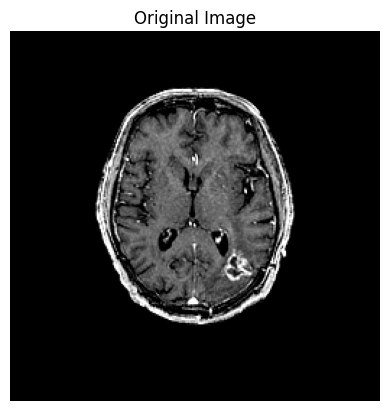

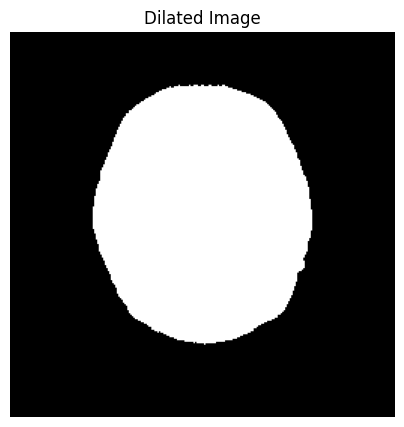

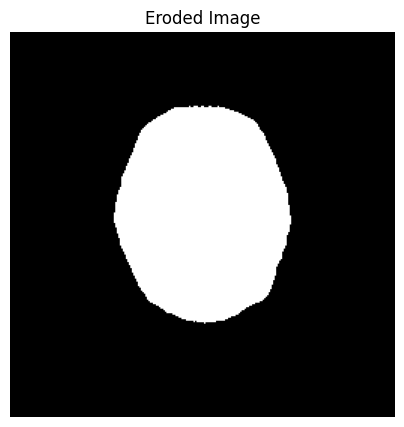

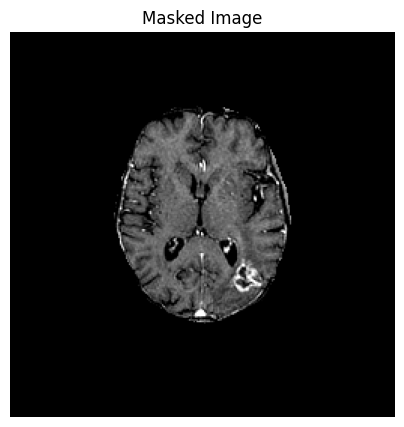

In [68]:
img = cv2.imread('../060.png', cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('images/sarcoma.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not found. Please provide a valid path.")

# plot original image

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# thresholding

_, binary_img = cv2.threshold(img, 20, 255, cv2.THRESH_BINARY)

# # plot the binary image
# plt.figure(figsize=(5, 5))

# plt.imshow(binary_img, cmap='gray')
# plt.title('Binary Image')
# plt.axis('off')
# plt.show()

# # erosion with elliptical kernel

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# eroded_img = cv2.erode(binary_img, kernel, iterations=2)

# # plot the eroded image
# plt.figure(figsize=(5, 5))

# plt.imshow(eroded_img, cmap='gray')
# plt.title('Eroded Image')
# plt.axis('off')
# plt.show()


# dilation with elliptical kernel

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
dilated_img = cv2.dilate(binary_img, kernel, iterations=2)

# plot the dilated image
plt.figure(figsize=(5, 5))

plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
plt.show()

# erosion with elliptical kernel

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
eroded_img = cv2.erode(dilated_img, kernel, iterations=2)

# plot the eroded image
plt.figure(figsize=(5, 5))

plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.show()

# apply as a mask 

masked_img = cv2.bitwise_and(img, img, mask=eroded_img)

# plot the masked image
plt.figure(figsize=(5, 5))

plt.imshow(masked_img, cmap='gray')
plt.title('Masked Image')
plt.axis('off')
plt.show()


C:\Users\ARGHYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


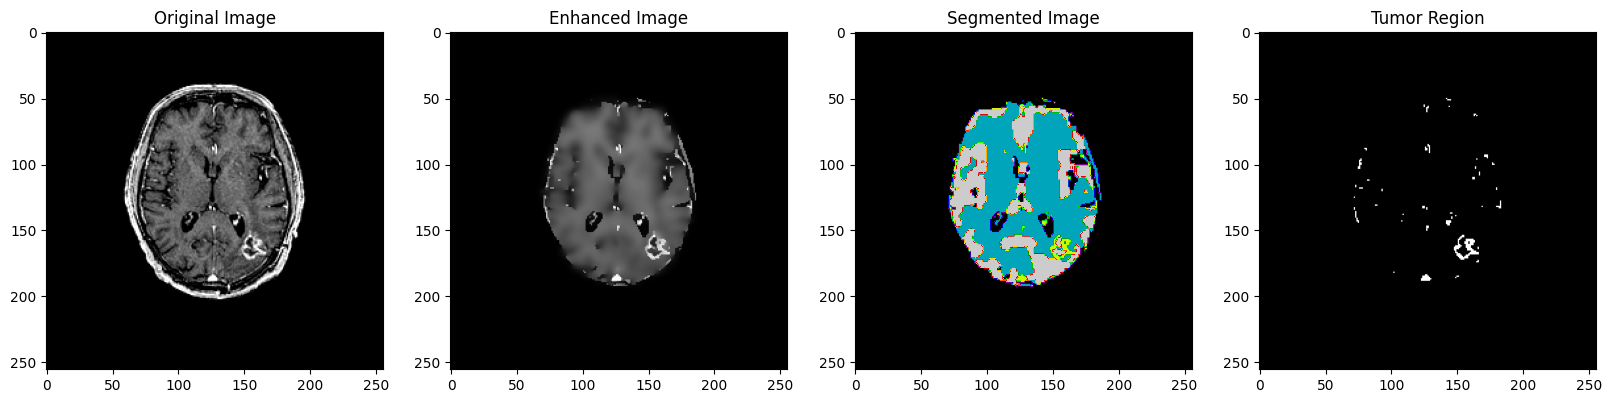

In [69]:
# img = cv2.imread('../060.png', cv2.IMREAD_GRAYSCALE)
# if img is None:
#     raise ValueError("Image not found. Please provide a valid path.")

# Step 1: Enhance the image using Perona-Malik anisotropic diffusion
# enhanced_img = perona_malik(img, n_iter=20, kappa=30, gamma=0.25)
enhanced_img = perona_malik(masked_img, n_iter=20, kappa=30, gamma=0.25)

# Step 2: Preprocess the image (skull stripping)
# preprocessed_img = preprocess_image(enhanced_img)

# Step 3: Perform K-means segmentation
# segmented_img = kmeans_segmentation(preprocessed_img, n_clusters=4)
segmented_img = kmeans_segmentation(enhanced_img, n_clusters=4)

# Step 4: Extract tumor (assume cluster ID 2 for tumor)
tumor_mask = segment_tumor(segmented_img, cluster_id=2)

# Step 5: Display results
# plt.figure(figsize=(10, 8))
plt.figure(figsize=(20, 8))
plt.subplot(1, 4, 1), plt.imshow(img, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 4, 2), plt.imshow(enhanced_img, cmap='gray'), plt.title("Enhanced Image")
plt.subplot(1, 4, 3), plt.imshow(segmented_img, cmap='nipy_spectral'), plt.title("Segmented Image")
plt.subplot(1, 4, 4), plt.imshow(tumor_mask, cmap='gray'), plt.title("Tumor Region")
plt.show()